# Data-exploration

## 1. Import the dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

100%|██████████| 1.47M/1.47M [00:00<00:00, 4.21MB/s]

Extracting files...
Path to dataset files: C:\Users\MY PC\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [2]:
import pandas as pd

In [3]:
books = pd.read_csv(f"{path}/books.csv")

In [5]:
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


## 2. Checking the missing data

In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Most of the subtitle data is missing, while other is seem kinda random

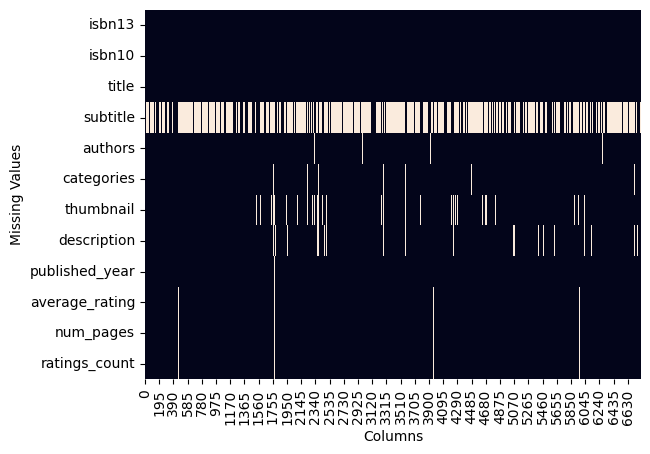

In [8]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing Values")

plt.show()

In [9]:
import numpy as np

books['missing_description'] = np.where(books['description'].isna(), 1, 0)
books['age_of_book'] = 2025 - books['published_year']

### Since the correlation of missing description with other missing features we can confidence that the description feature is good enough for the LLM model

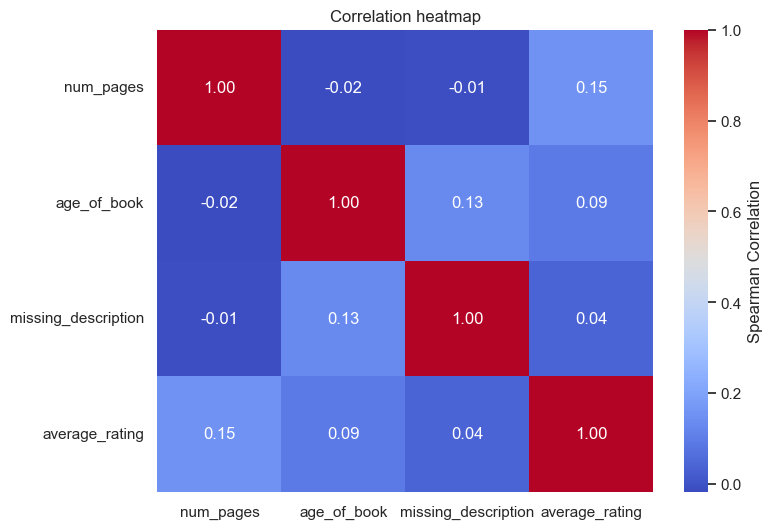

In [10]:
column_of_interest = ['num_pages', 'age_of_book', 'missing_description', 'average_rating']

correlation_matrix = books[column_of_interest].corr(method='spearman')

sns.set_theme(style="white")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt = '.2f', cmap='coolwarm', cbar_kws={'label': 'Spearman Correlation'})
heatmap.set_title('Correlation heatmap')

plt.show()

In [12]:
book_missing = books[~(books["description"].isna()) &
      ~(books['num_pages'].isna()) &
      ~(books['average_rating'].isna()) &
      ~(books['published_year'].isna())]

### The number of missing description is less than 5% so we just gonna drop it

In [13]:
book_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0


In [16]:
# count distinct values per column (including NaNs) and show counts + percentage of dataset
distinct_counts = book_missing.nunique(dropna=False)
distinct_summary = pd.DataFrame({
    "distinct_count": distinct_counts,
    "distinct_pct": (distinct_counts / len(book_missing) * 100).round(2)
}).sort_values("distinct_count", ascending=False)

distinct_summary

,distinct_count,distinct_pct
isbn13,6507,100.00
isbn10,6507,100.00
description,6434,98.88
thumbnail,6294,96.73
title,6133,94.25
ratings_count,3826,58.80
authors,3630,55.79
subtitle,1916,29.45
num_pages,890,13.68
categories,532,8.18


### There are plenty of categories, 530 to be exact. Since we gonna use this as a filter so in the latter notebook we will use an LLM classifier to make a shorter range of it

In [18]:
book_missing['categories'].value_counts().reset_index().sort_values('count', ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
526,Courage,1
527,Otherland (Imaginary place),1
528,Animals,1
529,Children of divorced parents,1


### The book descriptiong varies in different length so we only takes the one that have more 15 characters

In [20]:
book_missing['words_in_description'] = book_missing['description'].str.split().str.len()

C:\Users\MY PC\AppData\Local\Temp\ipykernel_22500\2882849729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing['words_in_description'] = book_missing['description'].str.split().str.len()


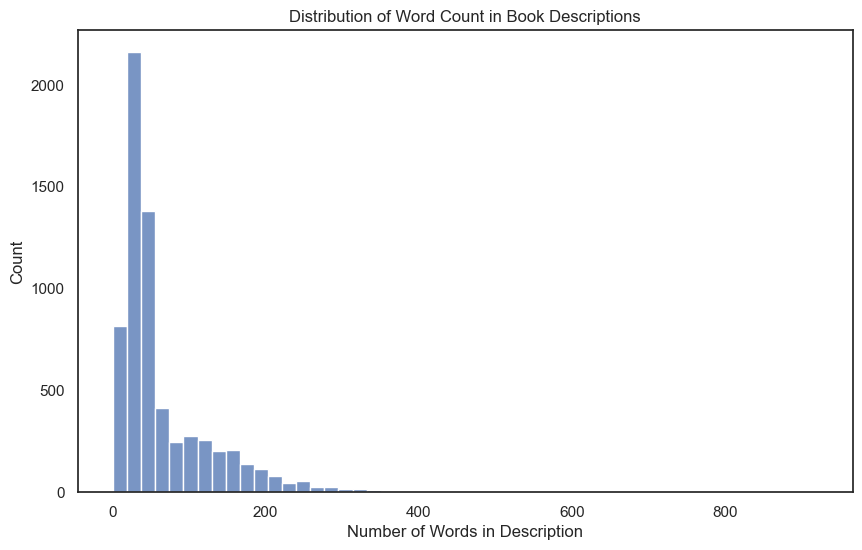

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=book_missing, x='words_in_description', bins=50)
plt.title('Distribution of Word Count in Book Descriptions')
plt.xlabel('Number of Words in Description')
plt.ylabel('Count')
plt.show()

In [22]:
book_missing.loc[book_missing['words_in_description'].between(1, 4), 'description']

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [24]:
book_missing.loc[book_missing['words_in_description'].between(4, 15), 'description']

2       Volume Two of Stephen Donaldson's acclaimed se...
38      Koko is Peter Straub's foray into the psycholo...
70      A matter of life and death - and the Throne of...
77                         Nonsense rhyming story. 4 yrs+
83      Tie your tongue in terrible knots as you try t...
                              ...                        
6730    Nineteen writers dig into the spaces between g...
6757                          Audio Book- unabriged on CD
6767    Everything from the fingerprints of the gods t...
6776    Raymond Chandler meets The Exorcist. Classic n...
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 408, dtype: object

In [23]:
len(book_missing.loc[book_missing['words_in_description'].between(1, 4), 'description'])

55

In [25]:
book_missing_15_words = book_missing[book_missing['words_in_description'] > 25]

In [26]:
len(book_missing_15_words)

5088

### Joining the subtitle (if it is not None) to the description to get some additional infomation

In [27]:
book_missing_15_words['title_and_subtitle'] = (
    np.where(book_missing_15_words['subtitle'].isna(), book_missing_15_words['title'],
             book_missing_15_words[['title', 'subtitle']].astype(str).agg(" ".join, axis=1))
)

C:\Users\MY PC\AppData\Local\Temp\ipykernel_22500\3628785027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_15_words['title_and_subtitle'] = (


In [28]:
book_missing_15_words['title_and_subtitle']

0                                                  Gilead
1                                    Spider's Web A Novel
3                                          Rage of angels
4                                          The Four Loves
5                                     The Problem of Pain
                              ...                        
6802                                    Mistaken Identity
6803                                  Journey to the East
6804    The Monk Who Sold His Ferrari: A Fable About F...
6805        I Am that Talks with Sri Nisargadatta Maharaj
6808                             The Berlin Phenomenology
Name: title_and_subtitle, Length: 5088, dtype: object

### We will concatnate the isbn13 to the tagged_descriptiong to merge it after the semetic search to get other data like thumbail, description, year of publish for the app

In [29]:
book_missing_15_words['tagged_description'] = book_missing_15_words[['isbn13', 'description']].astype(str).agg(" ".join, axis=1)

C:\Users\MY PC\AppData\Local\Temp\ipykernel_22500\3492454928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_15_words['tagged_description'] = book_missing_15_words[['isbn13', 'description']].astype(str).agg(" ".join, axis=1)


In [30]:
book_missing_15_words['tagged_description']

0       9780002005883 A NOVEL THAT READERS and critics...
1       9780002261982 A new 'Christie for Christmas' -...
3       9780006178736 A memorable, mesmerizing heroine...
4       9780006280897 Lewis' work on the nature of lov...
5       9780006280934 "In The Problem of Pain, C.S. Le...
                              ...                        
6802    9788172235222 On A Train Journey Home To North...
6803    9788173031014 This book tells the tale of a ma...
6804    9788179921623 Wisdom to Create a Life of Passi...
6805    9788185300535 This collection of the timeless ...
6808    9789027712059 Since the three volume edition o...
Name: tagged_description, Length: 5088, dtype: object

## 3. Saving the data

In [31]:
(
    book_missing_15_words
    .drop(['subtitle', 'missing_description', 'age_of_book', 'words_in_description'], axis=1)
    .to_csv('books_cleaned.csv', index=False)
)